In [12]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import copy

#Libraries for Statistical Models
import statsmodels.api as sm

from pickle import dump
from pickle import load

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
dataset = pd.read_excel("Data/SCFP2009panel.xlsx")

In [ ]:
average_sp500_2007 = 1478
average_sp500_2009 = 948

"""Risk Tolerance for 2007"""

dataset['RiskFree07'] = dataset['LIQ07'] + dataset['CDS07'] + \
    dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + \
    dataset['STOCKS07'] + dataset['BOND07']
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

"""Risk Tolerance for 2009"""

dataset['RiskFree09'] = dataset['LIQ09'] + dataset['CDS09'] + \
    dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + \
    dataset['STOCKS09'] + dataset['BOND09']
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09']) * (average_sp500_2007/average_sp500_2009)

In [ ]:
dataset2 = copy.deepcopy(dataset)
dataset2.head()

dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

print('Null Values =',dataset2.isnull().values.any())

In [ ]:
dataset2=dataset2.dropna(axis=0)
dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]

sns.distplot(dataset2['RT07'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})
sns.distplot(dataset2['RT09'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

In [ ]:
dataset3 = copy.deepcopy(dataset2)
dataset3 = dataset3[dataset3['PercentageChange']<=.1]

dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

correlation = dataset3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')



<Figure size 1080x1080 with 0 Axes>

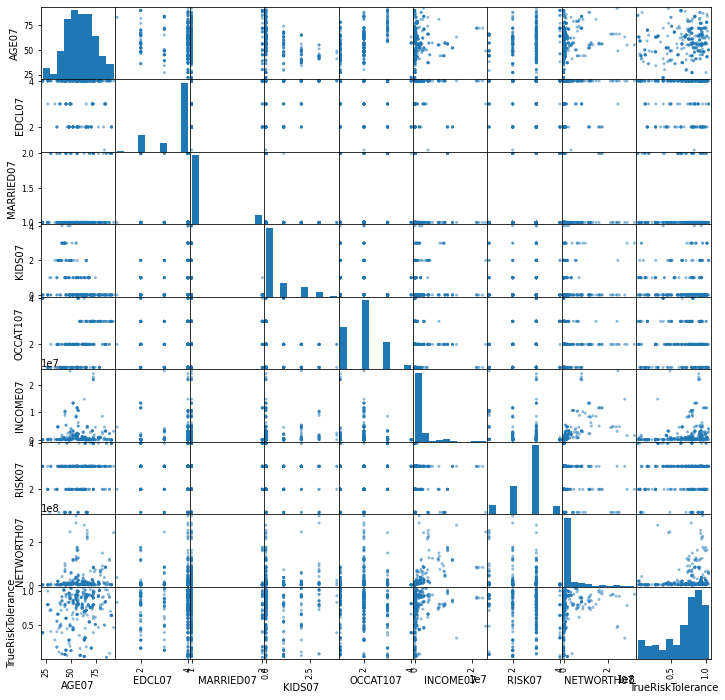

In [8]:
plt.figure(figsize=(15,15))
scatter_matrix(dataset3,figsize=(12,12))
plt.show()

